In [1]:
import base64
import zlib
import gzip

In [2]:
import requests
import matplotlib.pyplot as plt
from owslib.wms import WebMapService

In [3]:
# WMS endpoint
url = "https://geopdm.cm-porto.pt/services/pdm/wms"

# Connect to the WMS service
wms = WebMapService(url)

# Print available layers
print("Available layers:")
for layer in wms.contents:
    print(layer)

Available layers:
PDM_1A_PO_CQS
PDM_2021mai_RDP:RDP_AIPLANO_PL
PDM_2021mai_RDP:RDP_QSFUNCIONAL_PL
PDM_2021mai_RDP:RDP_QSOPERATIVA_PL
PDM_2021mai_RDP:RDP_LINHAS_MERGE
PDM_2021mai_RDP:RDP_PONTES_LN
PDM_2021mai_RDP:RDP_RPEDONAL_PL-NC1
PDM_2021mai_RDP:RDP_CRODOVIARIOS_LN-Proposta
PDM_2021mai_RDP:RDP_AIPMPPORMENOR_PL
PDM_2021mai_RDP:RDP_UOPGESTAO_PL
PDM_1B_PO_CEEM
PDM_2021mai_RDP:RDP_AVAPUBLICO_PL
PDM_2021mai_RDP:RDP_AVEVECOLOGICO_PL
PDM_2021mai_RDP:RDP_AVAZSENSIVEIS_PL
PDM_2021mai_RDP:RDP_RCONEXAO_PL
PDM_2021mai_RDP:RDP_CVERDES_PL
PDM_2021mai_RDP:RDP_AFARIBEIRINHA_PL
PDM_2021mai_RDP:RDP_ALUVIAO_PL
PDM_2021mai_RDP:RDP_ADECLIVOSA_PL
PDM_2021mai_RDP:RDP_LAGUA_LN
PDM_2021mai_RDP:RDP_BRETENCAO_PT
PDM_2021mai_RDP:RDP_CECOLOGICO_PL
PDM_2021mai_RDP:RDP_SRHOMOGENEAS_PL
PDM_1C_PO_CRN_AA1
PDM_2021mai_RDP:AA1_APARTIFICIALIZADAS_PL
PDM_2021mai_RDP:AA1_ZMPROTECAO_PL
PDM_2021mai_RDP:AA1_ZTPROTECAO_PL
PDM_2021mai_RDP:AA1_FSGICOSTEIRA_PL
PDM_2021mai_RDP:AA1_FSECOSTEIRA_PL
PDM_2021mai_RDP:AA1_PIPMARITIMAS_L

/Users/pedro.chaves/.pyenv/versions/3.10.0/lib/python3.10/site-packages/owslib/map/wms111.py:121: UserWarning: Content metadata for layer "PDM_2021mai_RDP:RDP_PONTES_LN" already exists. Using child layer
  warnings.warn('Content metadata for layer "%s" already exists. Using child layer' % cm.id)
/Users/pedro.chaves/.pyenv/versions/3.10.0/lib/python3.10/site-packages/owslib/map/wms111.py:121: UserWarning: Content metadata for layer "PDM_2021mai_RDP:RDP_AIPLANO_PL" already exists. Using child layer
  warnings.warn('Content metadata for layer "%s" already exists. Using child layer' % cm.id)
/Users/pedro.chaves/.pyenv/versions/3.10.0/lib/python3.10/site-packages/owslib/map/wms111.py:121: UserWarning: Content metadata for layer "PDM_2021mai_RDP:RDP_CIVPATRIMONIAL_PL" already exists. Using child layer
  warnings.warn('Content metadata for layer "%s" already exists. Using child layer' % cm.id)
/Users/pedro.chaves/.pyenv/versions/3.10.0/lib/python3.10/site-packages/owslib/map/wms111.py:121: Us

In [4]:
len(wms.contents)

136

In [20]:
wms.contents['PDM_2021mai_RDP:ZINCLUSIVO_PL2'].abstract

'PDM Informação de suporte'

In [5]:
# Latitude and longitude values
latitude = "41.14961"
longitude = "-8.61099"

# Nominatim reverse geocoding URL
reverse_geocode_url = "https://nominatim.openstreetmap.org/reverse"

# Define custom User-Agent
headers = {
    "User-Agent": "YourApplicationName/1.0 (mailto:your-email@example.com)"
}

# Parameters for the reverse search
params = {
    "lat": latitude,
    "lon": longitude,
    "format": "jsonv2"
}

# Make the request with the custom User-Agent
response = requests.get(reverse_geocode_url, params=params, headers=headers)

# Parse and print the response
location_data = response.json()
print(location_data)

{'place_id': 265607183, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'node', 'osm_id': 6540216044, 'lat': '41.149331', 'lon': '-8.6101404', 'category': 'amenity', 'type': 'library', 'place_rank': 30, 'importance': 7.251926451509908e-05, 'addresstype': 'amenity', 'name': 'Arquivo Geral Municipal', 'display_name': 'Arquivo Geral Municipal, 266, Praça do General Humberto Delgado, Baixa do Porto, Centro Histórico, Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória, Porto, 4000-274, Portugal', 'address': {'amenity': 'Arquivo Geral Municipal', 'house_number': '266', 'road': 'Praça do General Humberto Delgado', 'neighbourhood': 'Baixa do Porto', 'suburb': 'Centro Histórico', 'city_district': 'Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória', 'city': 'Porto', 'county': 'Porto', 'ISO3166-2-lvl6': 'PT-13', 'postcode': '4000-274', 'country': 'Portugal', 'country_code': 'pt'}, 'boundingbox': ['41.1492810', '41.1493810'

In [28]:
import requests
import pandas as pd
from owslib.wms import WebMapService

# Connect to the WMS service
url = "https://geopdm.cm-porto.pt/services/pdm/wms"
wms = WebMapService(url, version='1.1.1')

# Geocoded coordinates (example coordinates from geocoding service)
lat = 41.1687404
lon = -8.6170212

# Define a margin (in degrees) for the bounding box
# Example: a small margin of 0.001 degree for a very localized query
margin = 0.001

# Calculate custom bounding box around the coordinate of interest
min_lon = lon - margin
max_lon = lon + margin
min_lat = lat - margin
max_lat = lat + margin

# Create the bounding box parameter
bbox_parameter = f"{min_lon},{min_lat},{max_lon},{max_lat}"

# WMS image dimensions
width = 800
height = 600

# List to store all properties data
all_properties = []

# Iterate through each layer in the service

for layer_name in wms.contents:
    layer_metadata = wms.contents[layer_name]
    
    # Retrieve the bounding box for each layer
    try:
        bounding_box = layer_metadata.boundingBoxWGS84  # WGS84 coordinates
    except AttributeError:
        print(f"No bounding box available for {layer_name}. Skipping.")
        continue
    
    min_lon, min_lat, max_lon, max_lat = bounding_box
    
    # Calculate the pixel coordinates (x, y) for each layer based on its bounding box
    if min_lon <= lon <= max_lon and min_lat <= lat <= max_lat:
        print(f"The point is within the bounding box of {layer_name}. Continuing.")
    else:
        print(f"The point is not within the bounding box of {layer_name}. Skipping.")
        continue
    

    # Use this bounding box in your WMS GetFeatureInfo request
    params = {
        "service": "WMS",
        "version": "1.1.1",
        "request": "GetFeatureInfo",
        "layers": layer_name,  # Use the current layer name
        "query_layers": layer_name,
        "bbox": bbox_parameter,
        "width": 800,  # Pixel width matching the new bounding box aspect ratio
        "height": 600,  # Pixel height matching the new bounding box aspect ratio
        "srs": "EPSG:4326",
        "x": 400,  # X coordinate in the middle of the image
        "y": 300,  # Y coordinate in the middle of the image
        "info_format": "application/json",
    }
    
    # Send the request and handle the response
    response = requests.get(url, params=params)
    
    try:
        response_data = response.json()
        
        # Iterate through features and collect properties
        for feature in response_data.get('features', []):
            if wms.contents[layer_name].abstract == "PDM 2021":           
                all_properties.append(feature['properties'])
    except:
        print(f"Failed to fetch data for layer {layer_name}")

# Convert the collected properties into a DataFrame
df = pd.DataFrame(all_properties)

/Users/pedro.chaves/.pyenv/versions/3.10.0/lib/python3.10/site-packages/owslib/map/wms111.py:121: UserWarning: Content metadata for layer "PDM_2021mai_RDP:RDP_PONTES_LN" already exists. Using child layer
  warnings.warn('Content metadata for layer "%s" already exists. Using child layer' % cm.id)
/Users/pedro.chaves/.pyenv/versions/3.10.0/lib/python3.10/site-packages/owslib/map/wms111.py:121: UserWarning: Content metadata for layer "PDM_2021mai_RDP:RDP_AIPLANO_PL" already exists. Using child layer
  warnings.warn('Content metadata for layer "%s" already exists. Using child layer' % cm.id)
/Users/pedro.chaves/.pyenv/versions/3.10.0/lib/python3.10/site-packages/owslib/map/wms111.py:121: UserWarning: Content metadata for layer "PDM_2021mai_RDP:RDP_CIVPATRIMONIAL_PL" already exists. Using child layer
  warnings.warn('Content metadata for layer "%s" already exists. Using child layer' % cm.id)
/Users/pedro.chaves/.pyenv/versions/3.10.0/lib/python3.10/site-packages/owslib/map/wms111.py:121: Us

The point is within the bounding box of PDM_1A_PO_CQS. Continuing.
The point is within the bounding box of PDM_2021mai_RDP:RDP_AIPLANO_PL. Continuing.
Failed to fetch data for layer PDM_2021mai_RDP:RDP_AIPLANO_PL
The point is within the bounding box of PDM_2021mai_RDP:RDP_QSFUNCIONAL_PL. Continuing.
The point is within the bounding box of PDM_2021mai_RDP:RDP_QSOPERATIVA_PL. Continuing.
The point is within the bounding box of PDM_2021mai_RDP:RDP_LINHAS_MERGE. Continuing.
Failed to fetch data for layer PDM_2021mai_RDP:RDP_LINHAS_MERGE
The point is not within the bounding box of PDM_2021mai_RDP:RDP_PONTES_LN. Skipping.
The point is within the bounding box of PDM_2021mai_RDP:RDP_RPEDONAL_PL-NC1. Continuing.
The point is within the bounding box of PDM_2021mai_RDP:RDP_CRODOVIARIOS_LN-Proposta. Continuing.
The point is not within the bounding box of PDM_2021mai_RDP:RDP_AIPMPPORMENOR_PL. Skipping.
The point is within the bounding box of PDM_2021mai_RDP:RDP_UOPGESTAO_PL. Continuing.
The point i

In [33]:
concatenated_values_list = [
    " - ".join(str(value) for key, value in d.items() if "id" not in key)
    for d in all_properties
]
print(concatenated_values_list)

['Qualificação do solo funcional - Espaços centrais - Área de frente urbana contínua do tipo II', ' Qualificação do solo operativa - Espaço consolidado', 'Corredores verdes - Corredor verde complementar - Corredor Verde da Granja (Constituição / Regado)', 'Área de Aluvião', 'Sub-regiões homogéneas - Grande Porto', 'Zonamento acústico - Zona mista', 'Unidades territoriais perequativas - Área Central']


In [29]:
all_properties

[{'uuid': 'b61bb64c-2f0b-4d7b-aec8-20f3489de0b9',
  'tema_po': 'Qualificação do solo funcional',
  'obs_c_espaco': 'Espaços centrais',
  'obs_sc_espaco': 'Área de frente urbana contínua do tipo II',
  'id_objeto': 'b61bb64c-2f0b-4d7b-aec8-20f3489de0b9'},
 {'uuid': '4b6d8f7e-15ed-4ba9-9745-deb35438c66f',
  'tema_po': ' Qualificação do solo operativa',
  'obs_t_espaco': 'Espaço consolidado',
  'id_objeto': '4b6d8f7e-15ed-4ba9-9745-deb35438c66f'},
 {'uuid': '728ea325-3983-4aa1-a2e8-01c10c57c65d',
  'subtema_po': 'Corredores verdes',
  'tipologia': 'Corredor verde complementar',
  'designaç': 'Corredor Verde da Granja (Constituição / Regado)',
  'id_objeto': '728ea325-3983-4aa1-a2e8-01c10c57c65d'},
 {'uuid': '3c7c9d1f-1361-4ada-bb60-6a083f1c8901',
  'subtema_po': 'Área de Aluvião',
  'id_objeto': '3c7c9d1f-1361-4ada-bb60-6a083f1c8901'},
 {'uuid': 'bfa167fd-4a3c-48e4-818a-fdfed4566b18',
  'subtema_po': 'Sub-regiões homogéneas',
  'srh': 'Grande Porto',
  'id_objeto': 'bfa167fd-4a3c-48e4-818

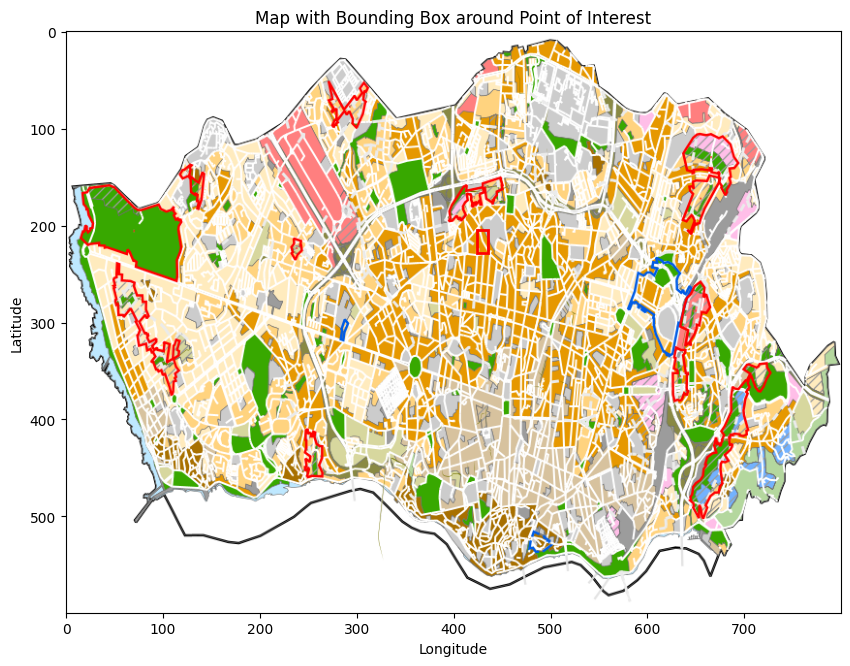

In [9]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from owslib.wms import WebMapService

# Connection parameters
url = "https://geopdm.cm-porto.pt/services/pdm/wms"
layer_name = "PDM_1A_PO_CQS"

# House geocoded coordinates
latitude = 41.1687404
longitude = -8.6170212
margin = 0.001  # Define a small margin

# Bounding box around the house coordinates
min_lon = longitude - margin
max_lon = longitude + margin
min_lat = latitude - margin
max_lat = latitude + margin

# Connect to WMS service
wms = WebMapService(url, version='1.1.1')
layer_metadata = wms.contents[layer_name]

# Layer bounding box (use it if it encompasses your area of interest)
layer_bbox = layer_metadata.boundingBoxWGS84  # WGS84 coordinates

# For visualization, use the layer bounding box; adjust if needed
bbox = ",".join(map(str, layer_bbox))

# WMS GetMap request parameters
params = {
    "service": "WMS",
    "version": "1.1.1",
    "request": "GetMap",
    "layers": layer_name,
    "styles": "",  # Use default layer style
    "bbox": bbox,  # Layer bounding box
    "width": 800,  # Width of image in pixels
    "height": 600,  # Height of image in pixels
    "srs": "EPSG:4326",
    "format": "image/png"
}

# Get the map image
response = requests.get(url, params=params)
img = Image.open(BytesIO(response.content))

# Plot the image and overlay the bounding box
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(img)

# Calculate pixel rectangle for bounding box
rect_x = (min_lon - layer_bbox[0]) / (layer_bbox[2] - layer_bbox[0]) * 800
rect_y = (layer_bbox[3] - max_lat) / (layer_bbox[3] - layer_bbox[1]) * 600
rect_width = (max_lon - min_lon) / (layer_bbox[2] - layer_bbox[0]) * 800
rect_height = (max_lat - min_lat) / (layer_bbox[3] - layer_bbox[1]) * 600

# Draw the bounding box
rect = patches.Rectangle((rect_x, rect_y), rect_width, rect_height, linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect)

plt.title("Map with Bounding Box around Point of Interest")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [1]:
from backend.helpers.chunker import PDFChunker

In [2]:
pdf_path = "backend/data/PDM_Porto_Aviso n.º 1934_2023.pdf"
chunker = PDFChunker(pdf_path)

In [4]:
chunks = chunker.split_pdf_by_sections("SECÇÃO")

In [5]:
len(chunks)

25

In [26]:
wms = WebMapService("https://geopdm.cm-porto.pt/services/pdm/wms", version="1.1.1")

layer = wms.contents[layer_name]
layer_info = {
    "keywords": layer.keywords,
    "title": layer.title,
    "name": layer.name,
    "boundingBoxWGS84": layer.boundingBoxWGS84,
}
print(layer_info)

{'keywords': ['features', 'ZINCLUSIVO_PL2'], 'title': 'Zonamento inclusivo', 'name': 'PDM_2021mai_RDP:ZINCLUSIVO_PL2', 'boundingBoxWGS84': (-8.633068618203888, 41.13960476925284, -8.589452839535474, 41.156732878345515)}


/Users/pedro.chaves/.pyenv/versions/3.10.0/lib/python3.10/site-packages/owslib/map/wms111.py:121: UserWarning: Content metadata for layer "PDM_2021mai_RDP:RDP_PONTES_LN" already exists. Using child layer
  warnings.warn('Content metadata for layer "%s" already exists. Using child layer' % cm.id)
/Users/pedro.chaves/.pyenv/versions/3.10.0/lib/python3.10/site-packages/owslib/map/wms111.py:121: UserWarning: Content metadata for layer "PDM_2021mai_RDP:RDP_AIPLANO_PL" already exists. Using child layer
  warnings.warn('Content metadata for layer "%s" already exists. Using child layer' % cm.id)
/Users/pedro.chaves/.pyenv/versions/3.10.0/lib/python3.10/site-packages/owslib/map/wms111.py:121: UserWarning: Content metadata for layer "PDM_2021mai_RDP:RDP_CIVPATRIMONIAL_PL" already exists. Using child layer
  warnings.warn('Content metadata for layer "%s" already exists. Using child layer' % cm.id)
/Users/pedro.chaves/.pyenv/versions/3.10.0/lib/python3.10/site-packages/owslib/map/wms111.py:121: Us